<a href="https://colab.research.google.com/github/dn-bit/sentiment_using_bert_model/blob/main/using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [6]:
df=pd.read_csv("IMDB_Dataset (1).csv",error_bad_lines=False)

<ipython-input-6-efe4b12d12f7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("IMDB_Dataset (1).csv",error_bad_lines=False)


In [7]:
df.shape

(5526, 2)

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df['sentiment'].value_counts()

negative    2788
positive    2738
Name: sentiment, dtype: int64

In [10]:
df['sentiment']=pd.get_dummies(df['sentiment'],drop_first=True)

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
!pip install tensorflow_text

In [18]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split

In [19]:
X=df['review']
y=df['sentiment']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [22]:
X_train.shape

(4420,)

In [23]:
X_test.shape

(1106,)

## Define model 

In [24]:
#Bert layers  ...........

input_text=tf.keras.layers.Input(shape=(),dtype=tf.string)
pre_text=bert_preprocess(input_text)
outputs=bert_encoder(pre_text)

In [25]:
#Neural Layers....................

l=tf.keras.layers.Dropout(0.1,name="drop")(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="Dense")(l)

#model functional

model=tf.keras.Model(inputs=[input_text],outputs=[l])



In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['input_1[0][0]']                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [27]:
METRICS=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=METRICS)



In [28]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
139/139 [==============================] - 62s 349ms/step - loss: 0.6921 - accuracy: 0.5367 - precision: 0.5322 - recall: 0.5472
Epoch 2/10
139/139 [==============================] - 55s 393ms/step - loss: 0.6516 - accuracy: 0.6172 - precision: 0.6232 - recall: 0.5777
Epoch 3/10
139/139 [==============================] - 55s 396ms/step - loss: 0.6276 - accuracy: 0.6548 - precision: 0.6543 - recall: 0.6448
Epoch 4/10
139/139 [==============================] - 53s 378ms/step - loss: 0.6080 - accuracy: 0.6753 - precision: 0.6795 - recall: 0.6544
Epoch 5/10
139/139 [==============================] - 51s 367ms/step - loss: 0.5962 - accuracy: 0.6826 - precision: 0.6805 - recall: 0.6790
Epoch 6/10
139/139 [==============================] - 52s 373ms/step - loss: 0.5882 - accuracy: 0.6910 - precision: 0.7008 - recall: 0.6580
Epoch 7/10
139/139 [==============================] - 52s 374ms/step - loss: 0.5836 - accuracy: 0.6959 - precision: 0.6972 - recall: 0.6845
Epoch 8/10
139/139 [

In [30]:
import numpy as np

pred_y=model.predict(X_test)
pred_y=np.where(pred_y>0.5,1,0)

35/35 [==============================] - 12s 353ms/step


In [31]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred_y)

<Axes: >

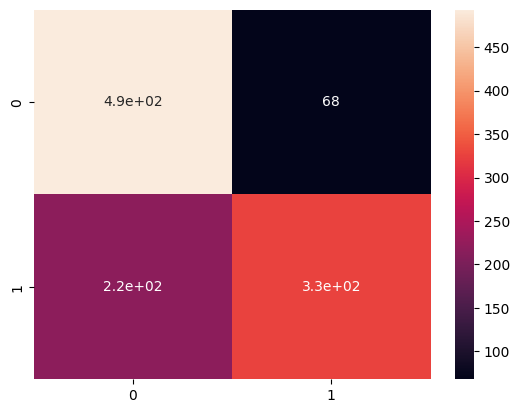

In [33]:
import seaborn as sns

sns.heatmap(cm,annot=True)

In [37]:
from sklearn.metrics import classification_report


print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       561
           1       0.83      0.60      0.69       545

    accuracy                           0.74      1106
   macro avg       0.76      0.74      0.73      1106
weighted avg       0.76      0.74      0.74      1106



In [45]:
sent=["movie is good"]

model.predict(sent)

1/1 [==============================] - 0s 68ms/step


array([[0.48558953]], dtype=float32)